## Neural Network for Classification.
This notebook is used for Testing different parameters for the Neural network, and generating the results. 

In [73]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("../code")
from cad_tests import *
import matplotlib.pyplot as plt
import pandas as pd
from cad_project import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


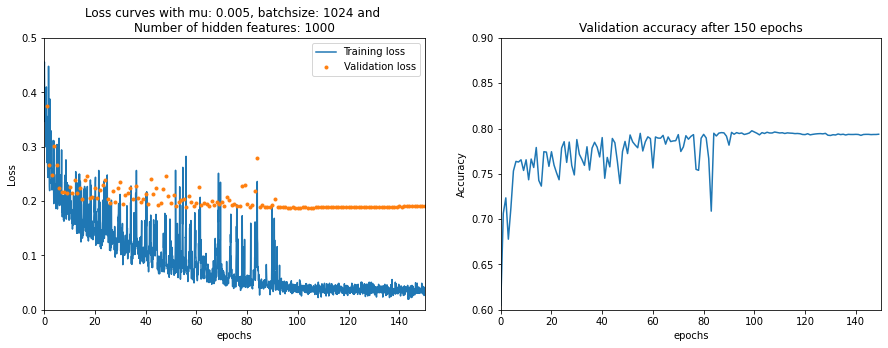

> Training finished


In [67]:
# testing different combinations of the learning rate and the batch size.

Data_weights_1 = {} 
Data_acc_1 = {}
for j in [32, 64, 512, 1024,2048]:
    for i in [0.0001, 0.0005, 0.0025, 0.005]:
        # if ((j==64 or j==32) and (i==0.005 or i==0.0025)) or ((j==512 or j==1024) and (i==0.0005 or i==0.0001)):
        #     continue 
        i_learning_rate = i
        j_batchsize = j
        n_hidden_features = 1000
        training_plot_N = f"exp_1_Nhf_{n_hidden_features}__bs_{j_batchsize}_mu_{i_learning_rate}"
        title = f"Loss curves with mu: {i_learning_rate}, batchsize: {j_batchsize} and \nNumber of hidden features: {n_hidden_features}"
        t = Training(i_learning_rate,j_batchsize,n_hidden_features,training_plot_N, title)
        t.data_preprocessing()
        t.define_shapes()
        w, Acc= t.launch_training()
        Data_weights_1[training_plot_N]=w
        Data_acc_1[training_plot_N]=Acc
        


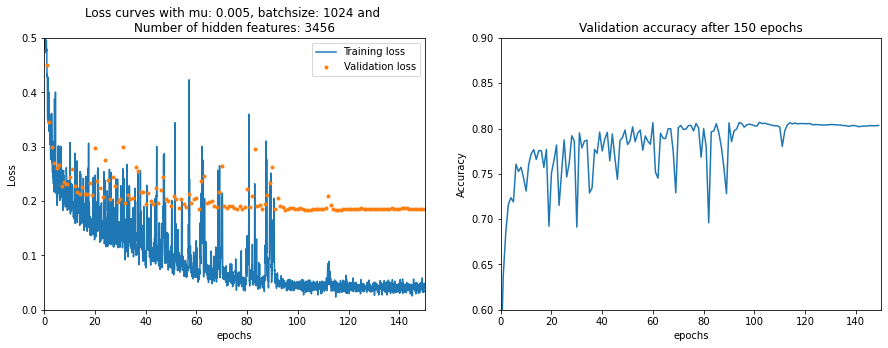

> Training finished


In [69]:
# testing the effect of the number of features in the hidden layer. 
Data_weights_2 = {} 
Data_acc_2 = {}
for h in [576, 1152, 1728, 3456]:
        i_learning_rate = 0.005
        j_batchsize = 1024
        n_hidden_features = h
        training_plot_N = f"exp_2_Nhf_{n_hidden_features}__bs_{j_batchsize}_mu_{i_learning_rate}"
        title = f"Loss curves with mu: {i_learning_rate}, batchsize: {j_batchsize} and \nNumber of hidden features: {n_hidden_features}"
        t = Training(i_learning_rate,j_batchsize,n_hidden_features,training_plot_N, title)
        t.data_preprocessing()
        t.define_shapes()
        w, Acc= t.launch_training()
        Data_weights_2[training_plot_N]=w
        Data_acc_2[training_plot_N]=Acc
        

In [88]:
df_Data_acc_1 = pd.DataFrame.from_dict([Data_acc_1])
df_Data_acc_2 = pd.DataFrame.from_dict([Data_acc_2])
print(df_Data_acc_1)
print(df_Data_acc_2)




   exp_1_Nhf_1000__bs_32_mu_0.0005  exp_1_Nhf_1000__bs_64_mu_0.0005  \
0                         0.755306                         0.744899   

   exp_1_Nhf_1000__bs_512_mu_0.0025  exp_1_Nhf_1000__bs_512_mu_0.005  \
0                          0.772559                         0.782692   

   exp_1_Nhf_1000__bs_1024_mu_0.0025  exp_1_Nhf_1000__bs_1024_mu_0.005  \
0                           0.790086                          0.795153   

   exp_1_Nhf_1000__bs_2048_mu_0.005  exp_1_Nhf_1000__bs_32_mu_0.0001  \
0                          0.814871                         0.726277   

   exp_1_Nhf_1000__bs_64_mu_0.0001  exp_3_Nhf_1000__bs_64_mu_0.0001  \
0                          0.72614                         0.731206   

   exp_1_Nhf_1000__bs_1024_mu_0.0001  exp_1_Nhf_1000__bs_64_mu_0.005  
0                            0.71943                         0.76092  
   exp_2_Nhf_576__bs_1024_mu_0.005  exp_2_Nhf_1152__bs_1024_mu_0.005  \
0                          0.79392                          0

In [79]:
weights_final = Data_weights_2["exp_2_Nhf_1728__bs_1024_mu_0.005"]
t = Training(0.005, 1024, 1728)
test_x, test_y = t.data_preprocessing(return_test=True)
get_results_testset_Neural_Network(test_x,test_y,weights_final)

Accuracy:  0.8055957549445248
False Positive Rate:  0.17210846707249586
Recall:  0.7811488673139159
Precision:  0.805422314911366
F1 Score:  0.7930999075880482
false negatives:  2164
